# Convolutional Neural Networks for a multiclass classification 

## This notebook will cover the following two major topics :

- Understand the basic concepts of CNN model
- Implement CNN model in realtime using Fashion MNIST dataset


# CNN Model

### Three basic components to define a basic convolutional neural network.

- The Convolutional Layer
- The Pooling layer
- The Output layer

<img src="https://www.researchgate.net/publication/336805909/figure/fig1/AS:817888827023360@1572011300751/Schematic-diagram-of-a-basic-convolutional-neural-network-CNN-architecture-26.ppm" />

## The Convolutional Layer:
In a convolutional layer, we use a weight matrix to extract specific features from an image. The weight matrix is like a filter that moves across the image, covering all the pixels. By multiplying the weight matrix with the corresponding part of the input image and adding the results, we obtain a convolved output. This process helps in sharing parameters and extracting useful features from the image. As we add more convolutional layers, the features extracted become more complex and specific.

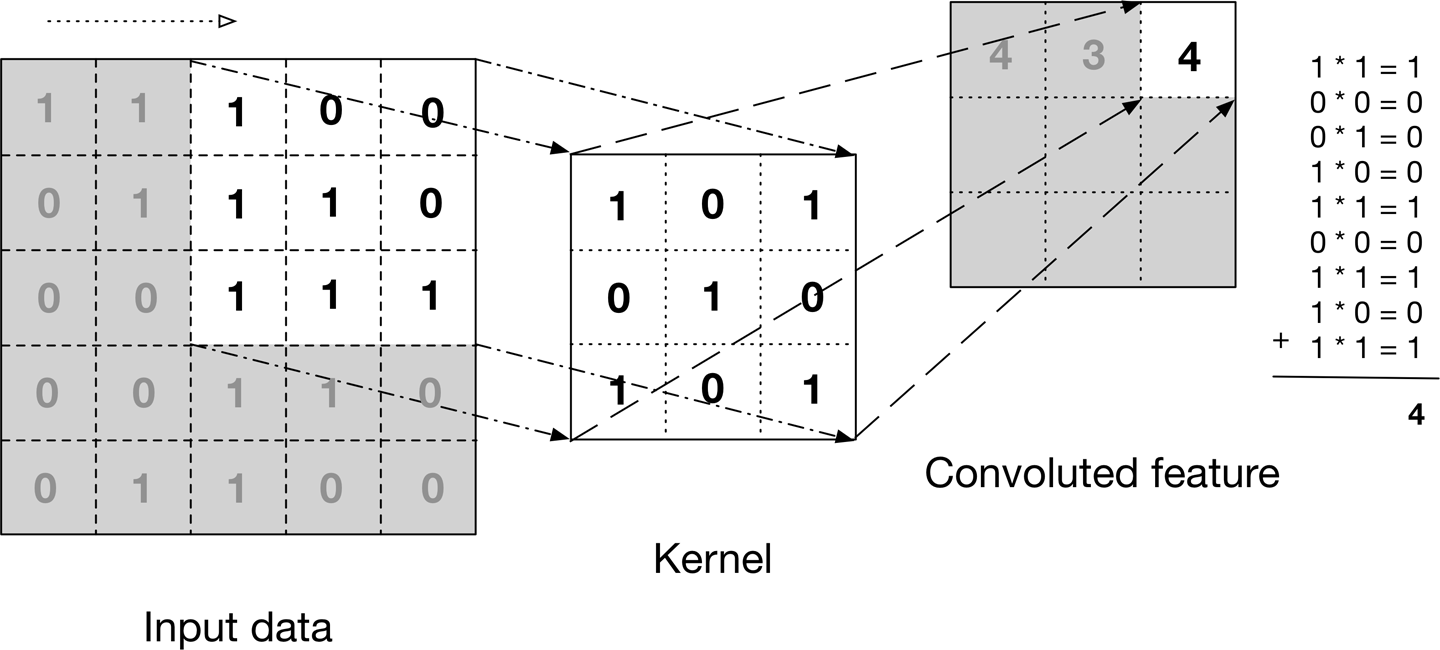

# The Pooling Layer:
Pooling layers are used to reduce the size of images and the number of parameters in a network. The most common type is max pooling, where the maximum value within a specific region is taken. By applying pooling independently to each depth dimension, the depth remains the same while the spatial size of the image decreases. This helps in retaining important information while reducing computational complexity.



<img src="https://miro.medium.com/v2/resize:fit:990/1*hOI0jW3CcS_yuxcmJIYjKw.gif" />

# The Output Layer:
The output layer is the final layer of a convolutional neural network (CNN). It takes the output from previous layers and generates the final prediction. To do this, a fully connected layer is used, which maps the input to the desired number of classes. The output layer has a loss function, such as categorical cross-entropy, to measure the error in the prediction. Through backpropagation, the weights and biases of the network are updated to minimize the error and improve the accuracy of the predictions.

# Fashion MNIST Dataset

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. 

## Labels
Each training and test example is assigned to one of the following labels:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

## Dataset in 3-D space
<img src="https://github.com/zalandoresearch/fashion-mnist/blob/master/doc/img/embedding.gif?raw=true" />

# Implement CNN model in realtime using Fashion MNIST dataset

# 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
num_classes = 10
epochs = 20


# 2 Getting the Dataset ready
# 2.1 Read the Dataset

In [ ]:
train_df = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv', sep = ',')

In [ ]:
train_df.head()

# 2.2 Preprocessing

In [ ]:
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype='float32')

#### Important Note : Since the image data in x_train and x_test is from 0 to 255 , we need to rescale this from 0 to 1.To do this we need to divide the x_train and x_test by 255 . It's important that the training set and the testing set be preprocessed in the same way

In [ ]:
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]

# 2.3 Train Test Val Split

In [ ]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 42)

# 2.4 Visualization

In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

# 2.5 Reshaping to the correct size

In [ ]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1) 

In [ ]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)


# 3 CNN Model
# 3.1 Defining the Model

- Convolutional Layer:
    - We add a Conv2D layer with 32 filters, each having a 3x3 kernel size.
    - ReLU activation function is applied to introduce non-linearity.
    - The input shape of the first layer is specified as image_shape.

- Max Pooling Layer:
    - We add a MaxPooling2D layer to downsample the output by taking the maximum value in each 2x2 region.
    - This reduces the spatial dimensions of the output to 14x14.

- Dropout Layer:
    - We add a Dropout layer with a rate of 0.2.
    - During training, 20% of the neurons in the previous layer will be randomly disabled to prevent overfitting.

- Flatten Layer:
    - We add a Flatten layer to convert the multi-dimensional output into a 1-dimensional vector.
    - This prepares the data for the fully connected layers.

- Fully Connected Layer:
    - We add a Dense layer with 32 units/neurons.
    - ReLU activation function is applied to introduce non-linearity.

- Output Layer:
    - We add a final Dense layer with 10 units/neurons, representing the number of classes in the classification task.
    - Softmax activation function is applied to obtain class probabilities.

In [ ]:
# Create a Sequential model
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=image_shape),  
    # Add a convolutional layer with 32 filters, each having a 3x3 kernel size
    # Apply ReLU activation function to introduce non-linearity
    # Specify the input shape of the first layer as 'image_shape'

    MaxPooling2D(pool_size=2),  
    # Add a max pooling layer to downsample the output by taking the maximum value in each 2x2 region
    # Reduces the spatial dimensions, resulting in a 14x14 output

    Dropout(0.2),  
    # Add a dropout layer to randomly disable 20% of the neurons during training
    # Helps prevent overfitting by reducing co-adaptation between neurons

    Flatten(),  
    # Flatten the multi-dimensional output into a 1-dimensional vector
    # Converts the output into a suitable format for feeding into a fully connected layer

    Dense(32, activation='relu'),  
    # Add a fully connected layer with 32 units/neurons
    # Apply ReLU activation function to introduce non-linearity

    Dense(10, activation='softmax')  
    # Add a final fully connected layer with 10 units/neurons (corresponding to the number of classes)
    # Apply softmax activation function to obtain class probabilities
])


In [ ]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

# 3.2 Model Summary

In [ ]:
cnn_model.summary()

# 3.3 Training the Model

In [ ]:
%%time
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=75,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

# 3.4 Evaluating our model

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

# 3.5 Testing the model on unseen data

In [ ]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Accuracy : {:.2f}'.format(score[1]*100) + '%')

# 3.6 Visualize some test labels

In [ ]:
predicted_probabilities = cnn_model.predict(x_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)

L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

# Thank You for reading